# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [59]:
import numpy as np
import pandas as pd



## Load the Data

In [60]:
df = pd.read_csv('/content/Traffic_Accident.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10

In [62]:
df.describe()

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51198.000000,52000.000000,51463.000000,51999.000000,51999.000000,51999.000000,50959.000000,51999.000000,51999.000000,51999.000000,51999.0
mean,52309.605596,439654.064615,338794.330769,-1.425829,52.940991,11.101904,2.848481,1.843060,1.358615,4.120009,155.142060,4.084155,1025.653859,36.768971,2.933383,340.922479,1.249736,2005.0
std,30282.566278,66711.811588,115731.113185,0.975537,1.044812,9.558172,0.390890,0.708149,0.804162,1.934134,114.153616,1.415258,1882.560604,12.707643,3.138719,1205.580339,0.432953,0.0
min,0.000000,296780.000000,156110.000000,-3.596752,51.289060,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,-1.000000,1.000000,2005.0
25%,25924.750000,388110.000000,194160.000000,-2.179555,51.630849,1.000000,3.000000,1.000000,1.000000,2.000000,32.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2005.0
50%,52285.500000,429505.000000,361950.000000,-1.552874,53.149640,10.000000,3.000000,2.000000,1.000000,4.000000,142.000000,3.000000,74.000000,30.000000,4.000000,0.000000,1.000000,2005.0
75%,78552.250000,516010.000000,415952.500000,-0.312861,53.638514,20.000000,3.000000,2.000000,1.000000,6.000000,254.000000,6.000000,642.000000,40.000000,6.000000,0.000000,1.000000,2005.0
max,104949.000000,559570.000000,656390.000000,0.350177,55.800830,48.000000,3.000000,18.000000,23.000000,7.000000,570.000000,6.000000,9999.000000,70.000000,6.000000,9711.000000,3.000000,2005.0


In [63]:
df.shape

(52000, 30)

In [64]:
df

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,58660,200511DJ27240,427910.0,515740.0,-1.570167,54.536179,11,3,2.0,1,...,55.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012363,2005.0
51996,101443,20053102C2156,450720.0,340010.0,-1.246470,52.955054,31,3,1.0,1,...,6002.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01028141,2005.0
51997,437,200501BS70452,526580.0,177540.0,-0.178465,51.482604,1,3,1.0,1,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01002840,2005.0
51998,61353,2.01E+12,426800.0,463700.0,-1.591972,54.068547,12,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,E01027681,2005.0


In [65]:
df.duplicated().sum()

0

In [66]:
df.isnull().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,802
Number_of_Casualties,0


In [67]:
df = df.drop(columns='Unnamed: 0')

In [68]:
df.duplicated().sum()

1

In [69]:
df = df.dropna()

In [70]:
df

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,24/04/2005,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,08/10/2005,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,02/04/2005,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,26/05/2005,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,11/01/2005,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,200511DJ27240,427910.0,515740.0,-1.570167,54.536179,11,3,2.0,1,10/11/2005,...,55.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012363,2005.0
51996,20053102C2156,450720.0,340010.0,-1.246470,52.955054,31,3,1.0,1,17/08/2005,...,6002.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01028141,2005.0
51997,200501BS70452,526580.0,177540.0,-0.178465,51.482604,1,3,1.0,1,22/08/2005,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01002840,2005.0
51998,2.01E+12,426800.0,463700.0,-1.591972,54.068547,12,3,2.0,2,18/12/2005,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,E01027681,2005.0


In [71]:
df.isnull().sum()

,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49595 entries, 0 to 51999
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               49595 non-null  object 
 1   Location_Easting_OSGR                        49595 non-null  float64
 2   Location_Northing_OSGR                       49595 non-null  float64
 3   Longitude                                    49595 non-null  float64
 4   Latitude                                     49595 non-null  float64
 5   Police_Force                                 49595 non-null  int64  
 6   Accident_Severity                            49595 non-null  int64  
 7   Number_of_Vehicles                           49595 non-null  float64
 8   Number_of_Casualties                         49595 non-null  int64  
 9   Date                                         49595 non-null  object 
 10  Day

In [73]:
ss = ['Date','Time','Local_Authority_(Highway)','LSOA_of_Accident_Location']

df = df.drop(columns=ss )

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49595 entries, 0 to 51999
Data columns (total 25 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               49595 non-null  object 
 1   Location_Easting_OSGR                        49595 non-null  float64
 2   Location_Northing_OSGR                       49595 non-null  float64
 3   Longitude                                    49595 non-null  float64
 4   Latitude                                     49595 non-null  float64
 5   Police_Force                                 49595 non-null  int64  
 6   Accident_Severity                            49595 non-null  int64  
 7   Number_of_Vehicles                           49595 non-null  float64
 8   Number_of_Casualties                         49595 non-null  int64  
 9   Day_of_Week                                  49595 non-null  float64
 10  Loc

In [75]:
df['Accident_Index'].value_counts()

,count
Accident_Index,
2.01E+12,12430
200505AW00473,1
200504CJ05015,1
200504TA05011,1
200506K027467,1
...,...
200501FH10388,1
200532B058905,1
200501SX20755,1


In [76]:
df = df.drop(columns='Accident_Index')

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49595 entries, 0 to 51999
Data columns (total 24 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        49595 non-null  float64
 1   Location_Northing_OSGR                       49595 non-null  float64
 2   Longitude                                    49595 non-null  float64
 3   Latitude                                     49595 non-null  float64
 4   Police_Force                                 49595 non-null  int64  
 5   Accident_Severity                            49595 non-null  int64  
 6   Number_of_Vehicles                           49595 non-null  float64
 7   Number_of_Casualties                         49595 non-null  int64  
 8   Day_of_Week                                  49595 non-null  float64
 9   Local_Authority_(District)                   49595 non-null  float64
 10  1st

In [78]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


columns_to_encode = ['Road_Surface_Conditions','Weather_Conditions','Light_Conditions','Pedestrian_Crossing-Physical_Facilities','Pedestrian_Crossing-Human_Control','Road_Type','Did_Police_Officer_Attend_Scene_of_Accident' ]

label_encoder = LabelEncoder()


for column in columns_to_encode:
    df[column+'_Encoded'] = label_encoder.fit_transform(df[column])

df.drop(columns=columns_to_encode, inplace=True)



In [79]:
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),...,2nd_Road_Number,Urban_or_Rural_Area,Year,Road_Surface_Conditions_Encoded,Weather_Conditions_Encoded,Light_Conditions_Encoded,Pedestrian_Crossing-Physical_Facilities_Encoded,Pedestrian_Crossing-Human_Control_Encoded,Road_Type_Encoded,Did_Police_Officer_Attend_Scene_of_Accident_Encoded
0,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,1.0,254.0,...,0.0,2.0,2005.0,0,1,4,2,2,3,1
1,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,7.0,300.0,...,0.0,1.0,2005.0,0,1,4,2,2,4,1
2,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,7.0,25.0,...,454.0,1.0,2005.0,0,1,4,3,2,0,1
3,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,5.0,300.0,...,0.0,1.0,2005.0,0,1,2,2,2,0,0
4,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,3.0,251.0,...,0.0,2.0,2005.0,0,1,2,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,427910.0,515740.0,-1.570167,54.536179,11,3,2.0,1,5.0,161.0,...,55.0,1.0,2005.0,0,1,4,2,2,3,1
51996,450720.0,340010.0,-1.246470,52.955054,31,3,1.0,1,4.0,346.0,...,6002.0,1.0,2005.0,0,1,4,3,2,3,1
51997,526580.0,177540.0,-0.178465,51.482604,1,3,1.0,1,2.0,12.0,...,0.0,1.0,2005.0,5,5,4,4,2,3,1
51998,426800.0,463700.0,-1.591972,54.068547,12,3,2.0,2,1.0,182.0,...,0.0,2.0,2005.0,0,1,0,2,2,3,1


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49595 entries, 0 to 51999
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Location_Easting_OSGR                                49595 non-null  float64
 1   Location_Northing_OSGR                               49595 non-null  float64
 2   Longitude                                            49595 non-null  float64
 3   Latitude                                             49595 non-null  float64
 4   Police_Force                                         49595 non-null  int64  
 5   Accident_Severity                                    49595 non-null  int64  
 6   Number_of_Vehicles                                   49595 non-null  float64
 7   Number_of_Casualties                                 49595 non-null  int64  
 8   Day_of_Week                                          49595 non-null  fl

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [82]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

In [83]:
pca.components_

array([[-0.39958041,  0.4129358 , -0.39364663,  0.41379152,  0.2672742 ,
        -0.03002025,  0.03713343,  0.10361973, -0.00136473,  0.30567619,
        -0.0099504 ,  0.09264322,  0.23652442, -0.07692602,  0.0464177 ,
         0.25897496,  0.        ,  0.11163134,  0.06198772, -0.03884493,
        -0.07388142, -0.00321925, -0.0514763 ,  0.00696851],
       [ 0.22086063, -0.17219166,  0.22136117, -0.17253941,  0.06261348,
        -0.10162693,  0.11950005,  0.14051389, -0.02109409,  0.0187328 ,
        -0.38471655, -0.04901743,  0.48243728, -0.30403476, -0.06554484,
         0.37863618, -0.        ,  0.08914911,  0.04323747, -0.14732064,
        -0.08929192,  0.0510747 , -0.29895746,  0.1974834 ]])

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

In [84]:
import seaborn as sns


<Axes: xlabel='Longitude', ylabel='Latitude'>

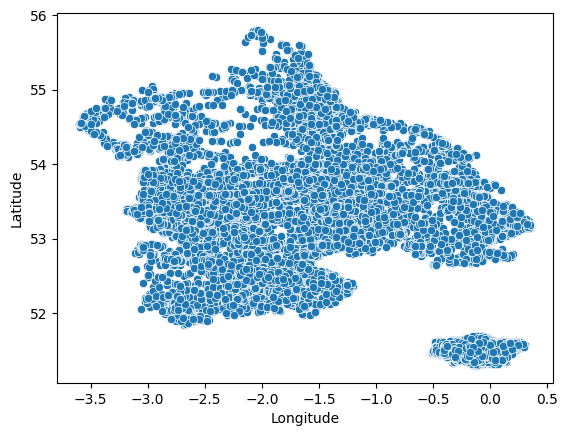

In [85]:
sns.scatterplot(x='Longitude',y='Latitude',data=df )

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [86]:
from sklearn.cluster import KMeans

ssd = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_pca)
    ssd.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [87]:
import seaborn as sns


<Axes: >

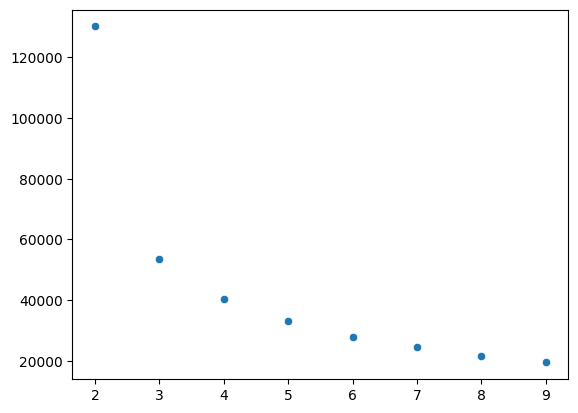

In [88]:
sns.scatterplot(x= range(2, 10), y=ssd )

the best value of k is k = 3



In [99]:
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=3)

kmeans3.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [100]:
from sklearn.metrics import silhouette_score
silhouette_score(df_pca, kmeans3.labels_)


0.23788169776302986

## Plot the data points with their predicted cluster center

<Axes: >

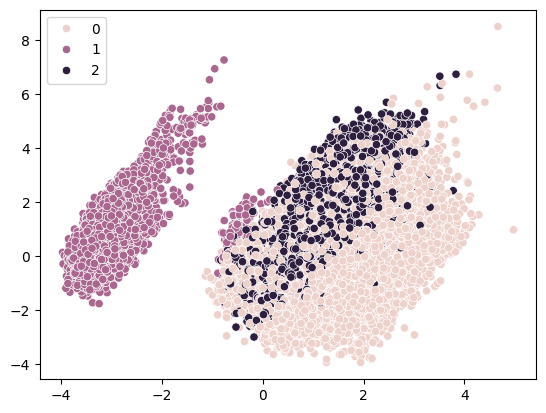

In [101]:
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=kmeans3.labels_)

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?